# **Naive Bayes Clasifier :**

## **Import library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/sentiment.csv')
df.head()

,Date,Replied To,Thread Title,Post Content,Post Clean,Sentiment
0,14-11-2019 09:54,beritafilistin,Perekam Wanita di Kamar Ganti Baju Mall Kerap ...,Dia pasti alumni 212,alumni 212,Neutral
1,01-10-2019 17:38,ibelindua,Gubernur Anies Sampaikan Ancaman Penggantian I...,Gak pernah ngaca ya,ngaca,Neutral
2,28-09-2019 10:56,matadewa909,"Kecewa Ponakan Prabowo Batal Baca Doa, Gerindr...",Alumni 212 mana suaranya,alumni 212 suaranya,Neutral
3,17-09-2019 12:41,SENORITA88,"Pria India Bikin Helm Pakai AC, Kepala Dingin ...",Malah masuk angin ntar,masuk angin ntar,Negative
4,28-08-2019 13:45,matthysse76,"Jokograd & Mandalanusa, Usulan Nama Ibu Kota B...",Wowoland city of kamprets,wowoland city of kamprets,Neutral


In [3]:
data = df[['Post Clean','Sentiment']]
data.head()

,Post Clean,Sentiment
0,alumni 212,Neutral
1,ngaca,Neutral
2,alumni 212 suaranya,Neutral
3,masuk angin ntar,Negative
4,wowoland city of kamprets,Neutral


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Post Clean  1963 non-null   object
 1   Sentiment   1969 non-null   object
dtypes: object(2)
memory usage: 30.9+ KB


## **Import Library ScikiLearn**

In [4]:
# Library untuk membagi dataset menjadi data training dan data testing
from sklearn.model_selection import train_test_split
# Library untuk mengubah teks menjadi representasi numerik dengan metode TF-IDF (Term Frequency-Inverse Document Frequency)
from sklearn.feature_extraction.text import TfidfVectorizer
# Library untuk menggunakan algoritma Naive Bayes multinomial untuk klasifikasi
from sklearn.naive_bayes import MultinomialNB
# Library untuk menghitung metrik evaluasi seperti akurasi, presisi, recall, dan F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Library untuk membuat confusion matrix untuk mengevaluasi performa model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## **Handling Missing Values**

In [5]:
# Menghapus baris yang memiliki nilai NaN (kosong) pada kolom 'Post Clean' dan 'Sentiment'
# Hal ini dilakukan karena data kosong tidak dapat digunakan untuk analisis sentimen
data = data.dropna(subset=['Post Clean', 'Sentiment'])

# Mengatur ulang indeks setelah baris dengan nilai NaN dihapus
# Tujuannya agar indeks tetap berurutan tanpa adanya celah
data = data.reset_index(drop=True)

# Memastikan tidak ada lagi nilai NaN yang tersisa dalam dataset
# Fungsi isnull().sum() digunakan untuk menghitung jumlah nilai NaN di setiap kolom
print(data.isnull().sum())

Post Clean    0
Sentiment     0
dtype: int64


## **Split Data**

In [6]:
# Memisahkan data menjadi fitur (X) dan label (y)
# 'Post Clean' adalah teks yang akan digunakan sebagai fitur
# 'Sentiment' adalah label yang menunjukkan sentimen (positif/negatif/neutral)
X = data['Post Clean']
y = data['Sentiment']

# Membagi dataset menjadi data training (60%) dan testing (40%)
# Parameter 'test_size=0.4' berarti 40% data akan digunakan untuk pengujian
# Parameter 'random_state=42' memastikan hasil pembagian data konsisten setiap kali kode dijalankan
# Parameter 'stratify=y' memastikan proporsi setiap kelas di label (y) tetap sama di training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Menampilkan jumlah data yang digunakan untuk training dan testing
# Tujuannya untuk memastikan data terbagi dengan proporsi yang benar
print(f"Jumlah data untuk training: {len(X_train)}")
print(f"Jumlah data untuk testing: {len(X_test)}")

Jumlah data untuk training: 1177
Jumlah data untuk testing: 786


## **Vectorize Text Data**

In [7]:
# Menginisialisasi TF-IDF Vectorizer
# TF-IDF (Term Frequency-Inverse Document Frequency) digunakan untuk mengubah teks menjadi representasi numerik
# Tujuannya adalah memberikan bobot lebih tinggi pada kata-kata yang unik di setiap dokumen dan bobot lebih rendah pada kata-kata umum
vectorizer = TfidfVectorizer()

# Melakukan fit (mempelajari pola) dan transformasi data training
# Data training diubah menjadi bentuk matriks TF-IDF yang siap untuk digunakan dalam model
X_train_vectorized = vectorizer.fit_transform(X_train)

# Melakukan transformasi data testing berdasarkan pola yang dipelajari dari data training
# Data testing hanya ditransformasikan tanpa mempelajari ulang pola (agar konsisten dengan data training)
X_test_vectorized = vectorizer.transform(X_test)

## **Train Naive Bayes Classifier**

In [8]:
# Membuat objek classifier menggunakan algoritma Naive Bayes Multinomial
# Algoritma ini cocok untuk data kategori, seperti representasi teks yang sudah diubah menjadi vektor TF-IDF
nb_classifier = MultinomialNB()

# Melatih model Naive Bayes dengan data training yang sudah diubah menjadi vektor TF-IDF
# Data 'X_train_vectorized' adalah fitur, dan 'y_train' adalah label (sentimen)
nb_classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

## **Evaluate Model**

In [9]:
# Membuat prediksi pada data testing
# Model menggunakan data testing yang telah diubah menjadi vektor TF-IDF untuk memprediksi sentimen
y_pred = nb_classifier.predict(X_test_vectorized)

# Menghitung metrik evaluasi model
# Akurasi: Persentase prediksi yang benar dari semua prediksi
accuracy = accuracy_score(y_test, y_pred)

# Presisi: Kemampuan model untuk hanya memprediksi positif pada kelas yang benar (diukur per kelas, rata-rata dihitung 'weighted')
precision = precision_score(y_test, y_pred, average='weighted')

# Recall (Sensitivitas): Kemampuan model untuk menemukan semua kasus positif di setiap kelas (diukur per kelas, rata-rata dihitung 'weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# F1-Score: Harmonik rata-rata antara presisi dan recall (rata-rata dihitung 'weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Menampilkan hasil metrik evaluasi model
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Menampilkan laporan klasifikasi secara rinci
# Laporan ini berisi nilai presisi, recall, dan F1-Score untuk setiap kelas, serta rata-rata keseluruhannya
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.60
Precision: 0.64
Recall: 0.60
F1-Score: 0.55

Classification Report:

              precision    recall  f1-score   support

    Negative       0.58      0.92      0.71       362
     Neutral       0.63      0.42      0.50       289
    Positive       0.81      0.13      0.22       135

    accuracy                           0.60       786
   macro avg       0.67      0.49      0.48       786
weighted avg       0.64      0.60      0.55       786



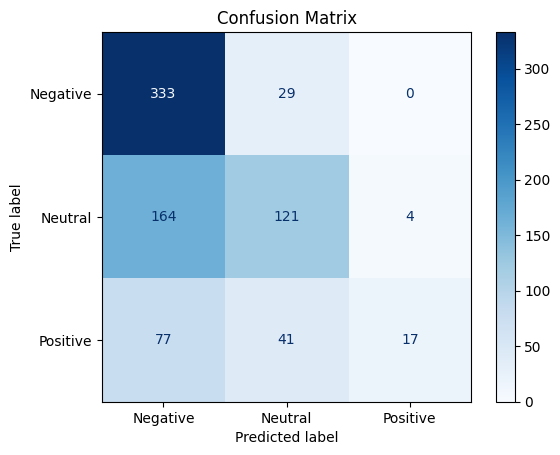

In [10]:
# Menghitung confusion matrix
# Confusion matrix menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas
# Parameter 'labels' memastikan urutan label sesuai dengan kelas: 'Negative', 'Neutral', dan 'Positive'
cm = confusion_matrix(y_test, y_pred, labels=['Negative', 'Neutral', 'Positive'])

# Membuat visualisasi confusion matrix
# ConfusionMatrixDisplay digunakan untuk menampilkan confusion matrix dalam bentuk grafik
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Neutral', 'Positive'])

# Menampilkan confusion matrix dengan skema warna biru
disp.plot(cmap=plt.cm.Blues)

# Menambahkan judul pada grafik confusion matrix
plt.title('Confusion Matrix')

# Menampilkan grafik confusion matrix
plt.show()

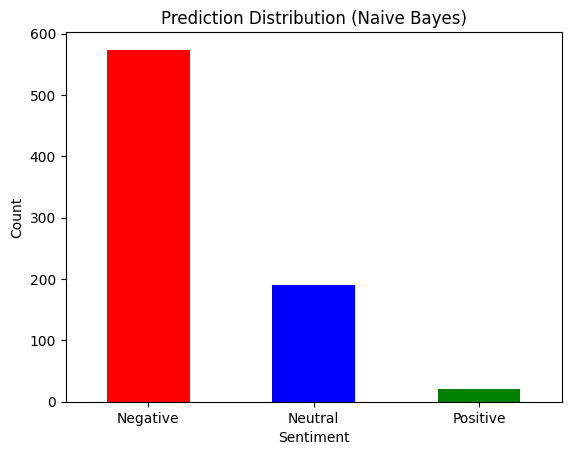

In [11]:
# Menambahkan hasil prediksi ke dalam data testing
# Dimulai dengan membuat salinan dari data teks (X_test)
results = X_test.copy()

# Mengatur ulang indeks agar konsisten dengan prediksi dan label asli
results = results.reset_index(drop=True)

# Membuat DataFrame baru untuk menyimpan data asli (Post), label sebenarnya (True Sentiment),
# dan label prediksi (Predicted Sentiment)
results = pd.DataFrame({
    'Post': results,                       # Teks asli dari data testing
    'True Sentiment': y_test.values,       # Sentimen asli (label ground truth)
    'Predicted Sentiment': y_pred          # Sentimen yang diprediksi oleh model
})

# Membuat visualisasi distribusi prediksi
# Menghitung jumlah prediksi untuk setiap kategori sentimen (Negative, Neutral, Positive)
results['Predicted Sentiment'].value_counts().plot(
    kind='bar',                            # Jenis grafik: bar chart
    color=['red', 'blue', 'green']         # Warna untuk setiap bar
)

# Menambahkan judul dan label untuk grafik
plt.title('Prediction Distribution (Naive Bayes)')
plt.xlabel('Sentiment')                    # Label untuk sumbu X
plt.ylabel('Count')                        # Label untuk sumbu Y
plt.xticks(rotation=0)                     # Menjaga label pada sumbu X tetap horizontal

# Menampilkan grafik
plt.show()

## **Applying Sentiment Analysis Model to the Entire Dataset**

In [14]:
# Melakukan vektorisasi pada seluruh dataset menggunakan TfidfVectorizer
# TF-IDF lebih memperhatikan kata yang jarang muncul di seluruh dokumen dan memberi bobot lebih tinggi pada kata-kata tersebut
#vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(data['Post Clean'].fillna(''))  # Mengisi NaN dengan string kosong untuk menangani missing values

# Melatih model Naive Bayes pada data yang telah divisualisasikan
# 'X_vectorized' adalah fitur yang mewakili teks, dan 'data['Sentiment']' adalah label sentimen
nb_model = MultinomialNB()
nb_model.fit(X_vectorized, data['Sentiment'])

MultinomialNB()

In [15]:
# Memprediksi sentimen untuk seluruh dataset
# Menggunakan model Naive Bayes yang sudah dilatih untuk memprediksi sentimen dari data teks yang telah vektorisasi
y_pred_all = nb_model.predict(X_vectorized)

# Menambahkan hasil prediksi sentimen ke dalam dataset
# Kolom 'Predicted Sentiment' akan berisi hasil prediksi untuk setiap teks dalam dataset
data['Predicted Sentiment'] = y_pred_all

In [16]:
# Menambahkan hasil prediksi sentimen sebagai kolom baru dalam DataFrame
# Kolom 'Predicted Sentiment' berisi hasil prediksi yang telah dilakukan oleh model
data['Predicted Sentiment'] = y_pred_all

# Menampilkan DataFrame yang berisi kolom 'Post Clean' (teks asli), 'Sentiment' (sentimen asli),
# dan 'Predicted Sentiment' (sentimen hasil prediksi)
data_with_predictions = data[['Post Clean', 'Sentiment', 'Predicted Sentiment']]

# Menampilkan 5 baris pertama dari DataFrame dengan kolom-kolom tersebut
data_with_predictions.head()

,Post Clean,Sentiment,Predicted Sentiment
0,alumni 212,Neutral,Neutral
1,ngaca,Neutral,Neutral
2,alumni 212 suaranya,Neutral,Neutral
3,masuk angin ntar,Negative,Negative
4,wowoland city of kamprets,Neutral,Neutral


## **Visualisasi**

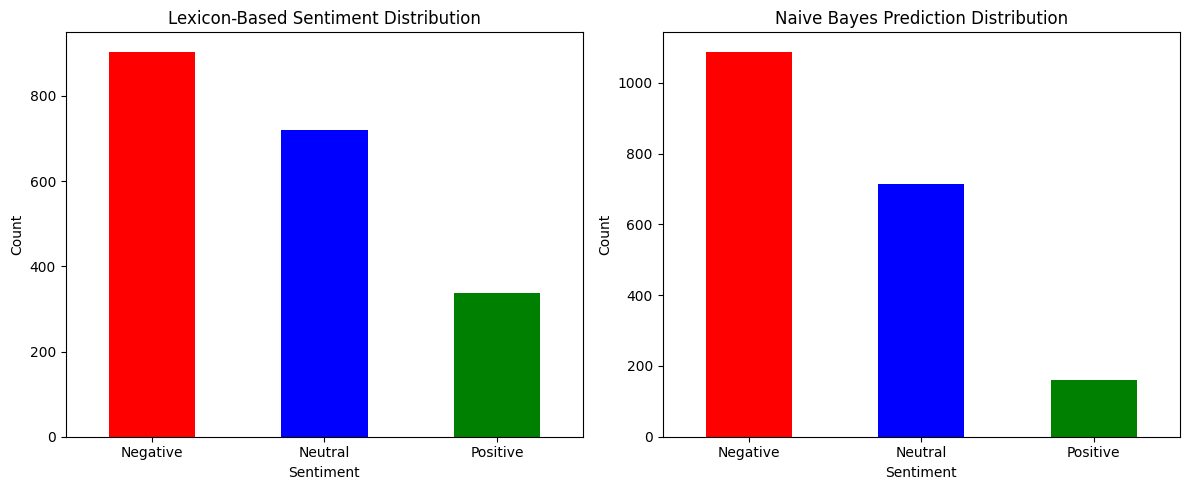

In [17]:
# Membuat subplot dengan 1 baris dan 2 kolom, ukuran gambar 12x5 inci
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Menampilkan distribusi sentimen berbasis lexicon (sentimen asli)
# Menggunakan value_counts() untuk menghitung jumlah setiap kategori sentimen
# Plot dengan tipe bar dan warna merah, biru, hijau untuk masing-masing kategori sentimen
data['Sentiment'].value_counts().plot(kind='bar', color=['red', 'blue', 'green'], ax=axes[0])
axes[0].set_title('Lexicon-Based Sentiment Distribution')  # Memberikan judul pada subplot pertama
axes[0].set_xlabel('Sentiment')  # Menambahkan label pada sumbu x
axes[0].set_ylabel('Count')  # Menambahkan label pada sumbu y
axes[0].tick_params(rotation=0)  # Mengatur rotasi label pada sumbu x agar tidak miring

# Menampilkan distribusi sentimen hasil prediksi menggunakan Naive Bayes
# Menggunakan value_counts() untuk menghitung jumlah setiap kategori sentimen yang diprediksi
# Plot dengan tipe bar dan warna merah, biru, hijau untuk masing-masing kategori sentimen
data['Predicted Sentiment'].value_counts().plot(kind='bar', color=['red', 'blue', 'green'], ax=axes[1])
axes[1].set_title('Naive Bayes Prediction Distribution')  # Memberikan judul pada subplot kedua
axes[1].set_xlabel('Sentiment')  # Menambahkan label pada sumbu x
axes[1].set_ylabel('Count')  # Menambahkan label pada sumbu y
axes[1].tick_params(rotation=0)  # Mengatur rotasi label pada sumbu x agar tidak miring

# Mengatur layout subplot agar lebih rapat dan tidak ada tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

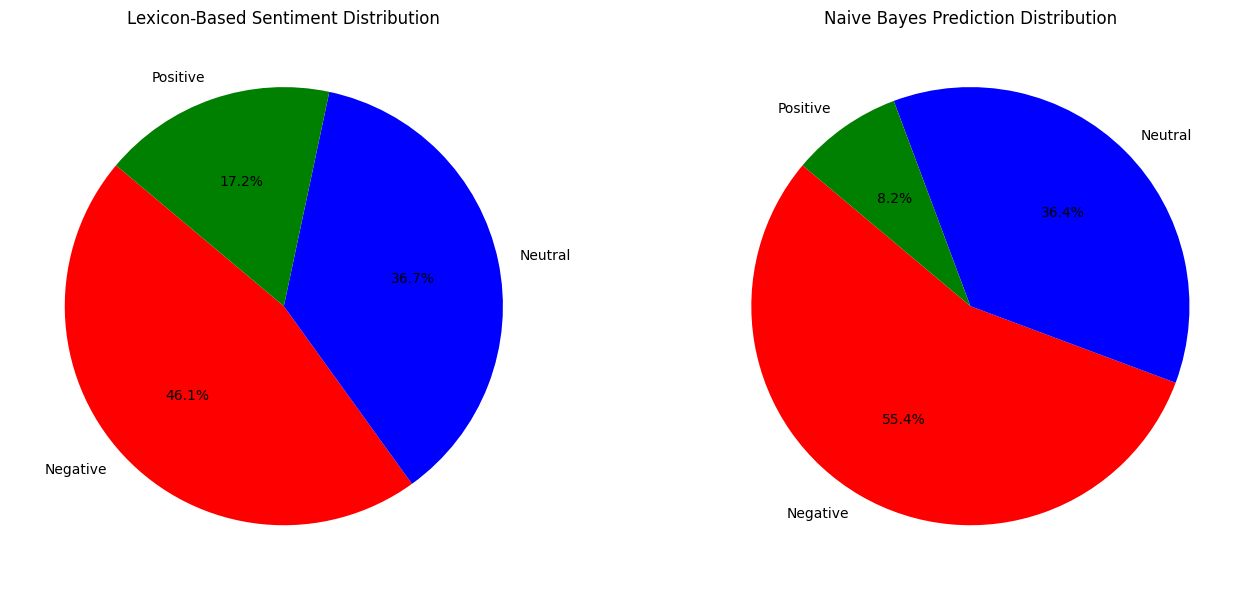

In [18]:
# Lexicon-based sentiment distribution
# Menghitung jumlah masing-masing kategori sentimen asli (berdasarkan lexicon) dalam data
lexicon_counts = data['Sentiment'].value_counts()

# Menghitung persentase distribusi sentimen asli
lexicon_percentages = (lexicon_counts / lexicon_counts.sum()) * 100

# Naive Bayes predicted sentiment distribution
# Menghitung jumlah masing-masing kategori sentimen hasil prediksi Naive Bayes
predicted_counts = data['Predicted Sentiment'].value_counts()

# Menghitung persentase distribusi sentimen hasil prediksi Naive Bayes
predicted_percentages = (predicted_counts / predicted_counts.sum()) * 100

# Membuat subplot dengan 1 baris dan 2 kolom, ukuran gambar 14x6 inci
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart untuk distribusi sentimen berbasis lexicon
# Menggunakan pie chart untuk menampilkan distribusi sentimen asli
# labels = kategori sentimen, autopct untuk menampilkan persentase, startangle untuk rotasi awal, dan colors untuk warna
axes[0].pie(lexicon_counts, labels=lexicon_counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'blue', 'green'])
axes[0].set_title('Lexicon-Based Sentiment Distribution')  # Memberikan judul pada chart pertama

# Pie chart untuk distribusi sentimen hasil prediksi Naive Bayes
# Menggunakan pie chart untuk menampilkan distribusi sentimen hasil prediksi
axes[1].pie(predicted_counts, labels=predicted_counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'blue', 'green'])
axes[1].set_title('Naive Bayes Prediction Distribution')  # Memberikan judul pada chart kedua

# Mengatur layout agar grafik tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()